# LOGISTIC REGRESSION IMPLEMENTATION

# Packages importing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn import metrics

# Cancer DataSet Loading

In [2]:
dataset_data=pd.read_csv("wdbc.dataset",header=None)

# Dropping column id

In [3]:
dataset_data.drop(0,axis=1,inplace=True)

# Mapping M to 1 and B to 0 and dropping the column to do normalization

In [4]:
dataset_data[1]=dataset_data[1].map({'M':1,'B':0})
diagnosis_details=dataset_data[1].values

exact_data=dataset_data.drop(1,axis=1)

# Normalization

In [5]:
normalized_data=(exact_data - np.min(exact_data))/(np.max(exact_data) - np.min(exact_data))
print(normalized_data)

           2         3         4         5         6         7         8   \
0    0.521037  0.022658  0.545989  0.363733  0.593753  0.792037  0.703140   
1    0.643144  0.272574  0.615783  0.501591  0.289880  0.181768  0.203608   
2    0.601496  0.390260  0.595743  0.449417  0.514309  0.431017  0.462512   
3    0.210090  0.360839  0.233501  0.102906  0.811321  0.811361  0.565604   
4    0.629893  0.156578  0.630986  0.489290  0.430351  0.347893  0.463918   
5    0.258839  0.202570  0.267984  0.141506  0.678613  0.461996  0.369728   
6    0.533343  0.347311  0.523875  0.380276  0.379164  0.274891  0.264058   
7    0.318472  0.376057  0.320710  0.184263  0.598267  0.445126  0.219447   
8    0.284869  0.409537  0.302052  0.159618  0.674099  0.533157  0.435567   
9    0.259312  0.484613  0.277659  0.140997  0.595558  0.675480  0.532568   
10   0.427801  0.457558  0.407090  0.277540  0.265686  0.145114  0.077296   
11   0.416442  0.276632  0.413309  0.270414  0.401462  0.336850  0.233224   

# Splitting the data into 80% training data, 10% validation data and 10%testing data


In [6]:
from sklearn.model_selection import train_test_split 

x_testing, x_training, y_testing, y_training = train_test_split(normalized_data,diagnosis_details, test_size = 0.9, random_state = 42) 

x_validation, x_training, y_validation, y_training = train_test_split(x_training, y_training, test_size = 0.9, random_state = 5) 

x_training = x_training.T 
y_training = y_training.T

x_testing = x_testing.T 
y_testing = y_testing.T

x_validation=x_validation.T
y_validation=y_validation.T

print("x training: ", x_training.shape) 
print("x testing: ", x_testing.shape) 
print("x validation: ", x_validation.shape)
print("y training: ", y_training.shape) 
print("y testing: ", y_testing.shape) 
print("y validation: ", y_validation.shape)



x training:  (30, 462)
x testing:  (30, 56)
x validation:  (30, 51)
y training:  (462,)
y testing:  (56,)
y validation:  (51,)


# Initializing weights and bias

In [7]:
def initialize_weights_and_biases(dimension): 
    weight = np.full((dimension, 1), 0.01) 
    bias = 0.0
    return weight, bias

# Declaring Sigmoid function

In [8]:
def sigmoid_function(z): 
    sigmoid_value = 1/(1 + np.exp(-z)) 
    return sigmoid_value 

# Defining Loss function

In [9]:
def loss_function(y_training,item):
    loss_function_value=- y_training * np.log(item) - (1 - y_training) * np.log(1 - item) 
    return loss_function_value

# Finding derivative of weights

In [10]:
def derivative_weights(x_training,item,y_training):
    dy=item-y_training
    m=x_training.shape[1]
    derivative_value=(np.dot(x_training,((dy).T)))/m
    return derivative_value

# Finding derivative of bias

In [11]:
def derivative_bias(x_training,item,y_training):
    dy=item-y_training
    m=x_training.shape[1]
    final_value=np.sum(dy)/m
    return final_value

# Data propagation

In [12]:
def propagate(weight,bias,x_training,y_training):
    #Calculating the linear function
    z=np.dot(weight.T,x_training)+bias
    #Calculating the sigmoid function
    item=sigmoid_function(z)
    #Calculating the loss function
    loss_data=loss_function(y_training,item)
    cost_data=(np.sum(loss_data)) / x_training.shape[1]
    derivative_of_weights=derivative_weights(x_training,item,y_training)
    derivative_of_bias=derivative_bias(x_training,item,y_training)
    #Getting the required gradients data
    gradients_data={"derivative_weight": derivative_of_weights, "derivative_bias": derivative_of_bias} 
    return cost_data,gradients_data


# Parameters updation and graph plotting

In [13]:
def parameters_updation(weight,bias,x_training,y_training,learning_rate,iterations_required):
    cost_details=[]
    cost_details2=[]
    index=[]
    for i in range(iterations_required):
        cost,gradients=propagate(weight,bias,x_training,y_training)
        cost_details.append(cost)
        weight=weight-learning_rate*gradients["derivative_weight"]
        bias=bias-learning_rate*gradients["derivative_bias"]
        if i%10==0:
            cost_details2.append(cost)
            index.append(i)
            print("cost for iteration % i is: % f" %(i,cost))     
    
    #Plotting of the graph
    parameters_updated={"weights":weight,"biases":bias}
    plt.plot(index, cost_details2) 
    plt.xticks(index, rotation ='vertical') 
    plt.xlabel("Epochs") 
    plt.ylabel("Accuracy") 
    plt.show() 
    return parameters_updated, gradients, cost_details

# Predictions on data

In [14]:
def prediction(weight,bias,data_testing): 
    z=sigmoid_function(np.dot(weight.T, data_testing)+bias) 
    data_prediction=np.zeros((1, data_testing.shape[1])) 
   
    for i in range(z.shape[1]): 
        if z[0, i]<=0.5: 
            data_prediction[0, i]=0
        else: 
            data_prediction[0, i]=1
    
    return data_prediction

# Logistic Regression

In [15]:
def logistic_regression_calculation(x_training,y_training,x_validation,y_validation,x_testing,y_testing,learning_rate,iterations_count): 
  
    item=x_training.shape[0] 
    weight,bias=initialize_weights_and_biases(item) 
          
    #calculating training related    
    print("TRAINING ACCURACY:")
    parameters,gradients,cost_lists=parameters_updation(weight,bias,x_training,y_training,learning_rate,iterations_count) 
    prediction_of_training=prediction(parameters["weights"], parameters["biases"],x_training)
    print("Training Accuracy: {} %".format(100-np.mean(np.abs(prediction_of_training-y_training))*100)) 
    print("\n\n\n\n")
    
    #calculating validation related
    print("VALIDATION ACCURACY:")
    parameters_validation,gradients_validation,cost_lists_validation=parameters_updation(parameters["weights"],parameters["biases"],x_validation,y_validation,learning_rate,iterations_count)
    prediction_of_validation=prediction(parameters_validation["weights"], parameters_validation["biases"],x_validation)
    print("Validation Accuracy: {} %".format(100-np.mean(np.abs(prediction_of_validation-y_validation))*100))
    print("\n\n\n\n")
    
    #calculating testing related 
    print("TESTING ACCURACY:")
    parameters_testing,gradients_testing,cost_lists_testing=parameters_updation(parameters_validation["weights"],parameters_validation["biases"],x_testing,y_testing,learning_rate,iterations_count)
    prediction_of_testing=prediction(parameters_testing["weights"],parameters_testing["biases"],x_testing)
    print("Test Accuracy: {} %".format(100-np.mean(np.abs(prediction_of_testing-y_testing))*100))
    print("\n\n")
    
    
    #Calculating Confusion Matrix on test data
    final_testing_data=prediction_of_testing[0]
    confusion_matrix_data=confusion_matrix(y_testing,final_testing_data)
    print("Confusion Matrix is:\n",confusion_matrix_data)
    
    #Calculating Accuracy on test data
    accuracy=np.abs(metrics.accuracy_score(y_testing,final_testing_data))*100
    print("Accuracy on the test data is:",accuracy,"%")

    #Calculating Precision on test data
    precision=np.abs(metrics.precision_score(y_testing,final_testing_data))*100
    print("Precision on the test data is:",precision,"%")

    #Calculating Recall on test data
    recall=np.abs(metrics.recall_score(y_testing,final_testing_data))*100
    print("Recall on the test data is:",recall,"%")
    
    


TRAINING ACCURACY:
cost for iteration  0 is:  0.693360
cost for iteration  10 is:  0.572412
cost for iteration  20 is:  0.495526
cost for iteration  30 is:  0.441408
cost for iteration  40 is:  0.401458
cost for iteration  50 is:  0.370752
cost for iteration  60 is:  0.346369
cost for iteration  70 is:  0.326488
cost for iteration  80 is:  0.309928
cost for iteration  90 is:  0.295885


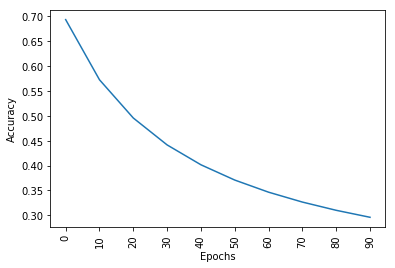

Training Accuracy: 93.72294372294373 %





VALIDATION ACCURACY:
cost for iteration  0 is:  0.301061
cost for iteration  10 is:  0.284053
cost for iteration  20 is:  0.275616
cost for iteration  30 is:  0.268112
cost for iteration  40 is:  0.261361
cost for iteration  50 is:  0.255242
cost for iteration  60 is:  0.249660
cost for iteration  70 is:  0.244538
cost for iteration  80 is:  0.239814
cost for iteration  90 is:  0.235435


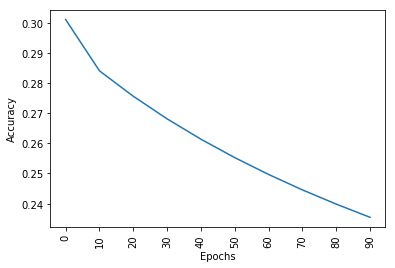

Validation Accuracy: 94.11764705882354 %





TESTING ACCURACY:
cost for iteration  0 is:  0.233899
cost for iteration  10 is:  0.223741
cost for iteration  20 is:  0.219017
cost for iteration  30 is:  0.214722
cost for iteration  40 is:  0.210709
cost for iteration  50 is:  0.206947
cost for iteration  60 is:  0.203411
cost for iteration  70 is:  0.200079
cost for iteration  80 is:  0.196934
cost for iteration  90 is:  0.193958


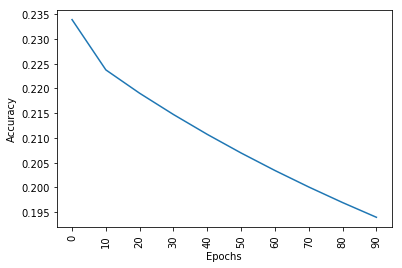

Test Accuracy: 92.85714285714286 %



Confusion Matrix is:
 [[36  1]
 [ 3 16]]
Accuracy on the test data is: 92.85714285714286 %
Precision on the test data is: 94.11764705882352 %
Recall on the test data is: 84.21052631578947 %


In [16]:
logistic_regression_calculation(x_training,y_training,x_validation,y_validation,x_testing,y_testing,learning_rate =0.5,iterations_count=100)